<a href="https://colab.research.google.com/github/anubhavgupta1/Dive-Into-Deep-Learning/blob/main/Softmax%20Regression%20/%20Concise%20Implementation%20/%20pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Softmax Regression

In [ ]:
!pip install d2l==0.16.1

In [2]:
from d2l import torch as d2l
import torch
from torch import nn

### Reading the minibatch

In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f18ce4a2668>,
      dtype=object)

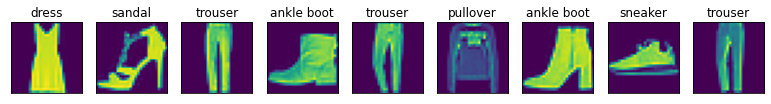

In [4]:
n = 9
for X, y in train_iter:
  break;
d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=d2l.get_fashion_mnist_labels(y))

###Initializing Model Parameters

In [5]:
# PyTorch does not implicitly reshape the inputs. Thus we define the flatten
# layer to reshape the inputs before the linear layer in our network
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

In [6]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

In [7]:
net.apply(init_weights);

### Defining the Loss Function

In [8]:
loss = nn.CrossEntropyLoss()

### Optimization Algorithm

In [9]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

### Training

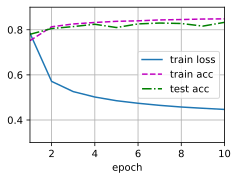

In [10]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [11]:
def predict(net, test_iter, n=6):  #@save
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

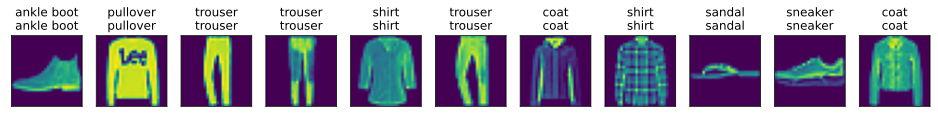

In [12]:
predict(net, test_iter, n=11)